# Geographic index demo

<img src="geo_index_integration.png">

In [2]:
import sys
sys.path = ["../../"] + sys.path
import importlib
import os
from fs import open_fs

# Import the factory that produces our map data structure for a given geographic region
from src.data.index.map_data_factory import MapDataFactory

In [3]:
# Copy the geographic index to the local directory
!gsutil cp gs://ml4cc_data_lake/0_DEV/2_Mart/0_InformationMart/geographic_index.pkl .

Copying gs://ml4cc_data_lake/0_DEV/2_Mart/0_InformationMart/geographic_index.pkl...
/ [1 files][986.9 KiB/986.9 KiB]                                                
Operation completed over 1 objects/986.9 KiB.                                    


In [4]:
# Instantiate a MapDataFactory from a saved geographic index structure
data_factory = MapDataFactory("geographic_index.pkl")
my_map_data = data_factory.create_map_data(37, 12, 38, 13)

In [4]:
# We see the contents of a dataclass corresponding to the selected map region, let's explore...
print(my_map_data)

MapData(metadata={MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955)), MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955)), MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_02PORTOPALO_DEL_MONIT01_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955)), MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_01RATTALORO_DEL_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955))}, satellite_images={'S2': {MapDataSource(path='worldfloods/tiffimages/S2/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/S2/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.tif', last_modified=datetime

In [5]:
# That MapData readout looks quite crowded-- let's pick it apart
help(my_map_data)

Help on MapData in module src.data.index.map_data object:

class MapData(builtins.object)
 |  Represents known data for a subset of the map separated by type of data
 |  
 |  @field metadata Set of MapDataSources with JSON metadata
 |  @field satellite_images Dictionary of Sets of MapDataSources with satellite image GeoTIF data, one set per data source
 |  @field floodmaps Set of MapDataSources containing shape files that detail flood-related geographic information
 |  @field cloudmasks Set of MapDataSources with GeoTIF cloud masks
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |  
 |  __init__(self, min_lat, min_lon, max_lat, max_lon, index_list)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak refer

In [6]:
# We see a few JSON files as the available metadata for resources in our selected map region
print(my_map_data.metadata)

{MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955)), MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955)), MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_02PORTOPALO_DEL_MONIT01_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955)), MapDataSource(path='worldfloods/tiffimages/meta/EMSR333_01RATTALORO_DEL_v1_observed_event_a.json', last_modified=datetime.datetime(2021, 2, 26, 20, 49, 18, 703955))}


In [7]:
# We see that there is satellite image data available from Landsat-8, Sentinel-2, and gt in the map region
print(my_map_data.satellite_images)

{'S2': {MapDataSource(path='worldfloods/tiffimages/S2/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/S2/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/S2/EMSR333_02PORTOPALO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/S2/EMSR333_01RATTALORO_DEL_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52))}, 'L8': {MapDataSource(path='worldfloods/tiffimages/L8/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/L8/EMSR333_02PORTOPALO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/L8/EMSR33

In [8]:
# We see that there are multiple floodmap shape files available in the selected map region
print(my_map_data.floodmaps)

{MapDataSource(path='worldfloods/tiffimages/floodmaps/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.shp', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/floodmaps/EMSR333_02PORTOPALO_DEL_MONIT01_v1_observed_event_a.shp', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/floodmaps/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.shp', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/floodmaps/EMSR333_01RATTALORO_DEL_v1_observed_event_a.shp', last_modified=datetime.datetime(2018, 11, 4, 9, 52))}


In [9]:
# We see that there are multiple cloud masks available in the selected map region
print(my_map_data.cloudmasks)

{MapDataSource(path='worldfloods/tiffimages/cloudprob/EMSR333_01RATTALORO_DEL_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/cloudprob/EMSR333_02PORTOPALO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/cloudprob/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52)), MapDataSource(path='worldfloods/tiffimages/cloudprob/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.tif', last_modified=datetime.datetime(2018, 11, 4, 9, 52))}


###### METADATA ######
worldfloods/tiffimages/meta/EMSR333_01RATTALORO_DEL_MONIT01_v1_observed_event_a.json
{
    "source": "CopernicusEMS",
    "satellite": "Sentinel-1",
    "satellite date": "2018-11-03T17:03:57Z",
    "shape": [
        793,
        1376
    ],
    "pixels invalid S2": 213171,
    "pixels clouds S2": 25221,
    "pixels water S2": 16551,
    "pixels land S2": 836225,
    "pixels flood water S2": 9829,
    "pixels hydro water S2": 6660,
    "pixels permanent water S2": 62,
    "method clouds": "s2cloudless",
    "bounds": [
        12.49080453109671,
        37.85653320877964,
        12.614412714191557,
        37.927769610810316
    ],
    "s2metadata": [
        {
            "date_string": "2018-11-04 09:52",
            "system:time_start": 1541325153150,
            "area_rel": 99
        }
    ]
}


worldfloods/tiffimages/meta/EMSR333_02PORTOPALO_DEL_v1_observed_event_a.json
{
    "source": "CopernicusEMS",
    "satellite": "Sentinel-1",
    "satellite date": 

/home/nicholas/ml_python/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/home/nicholas/ml_python/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/home/nicholas/ml_python/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
/home/nicholas/ml_python/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


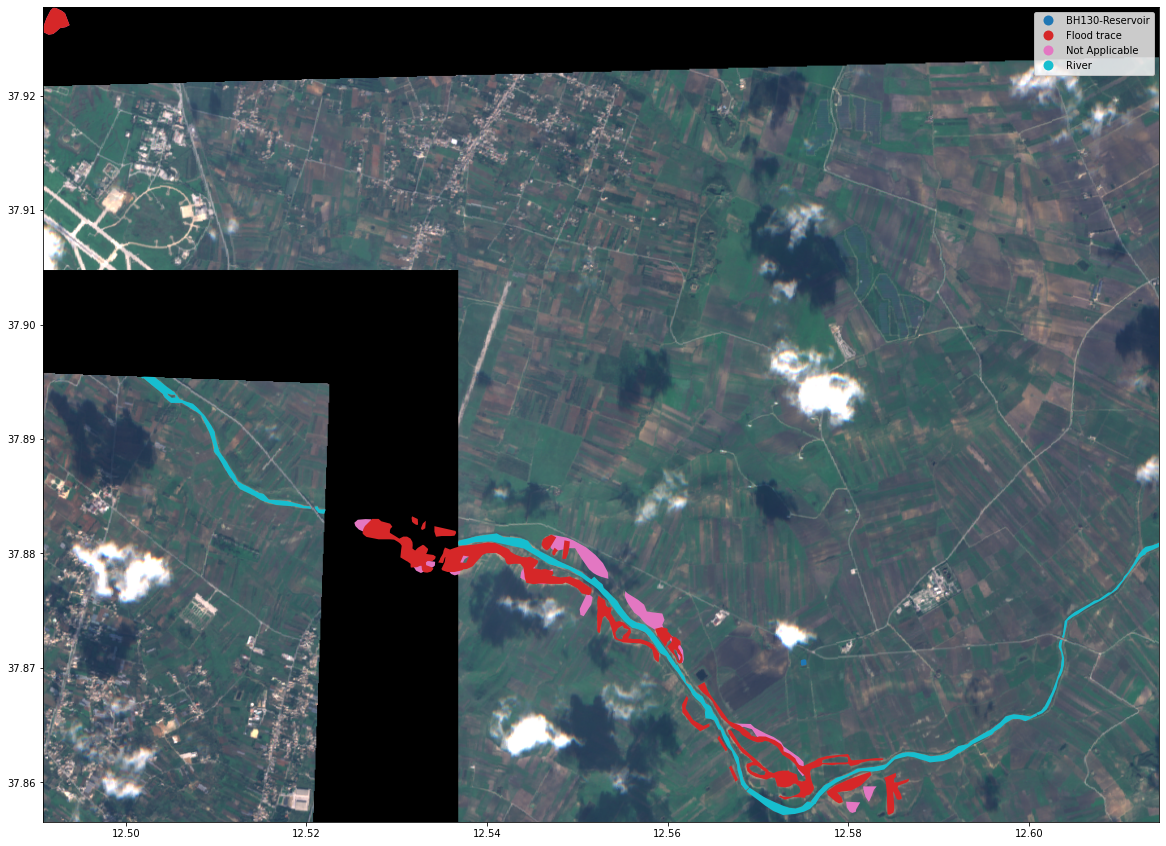

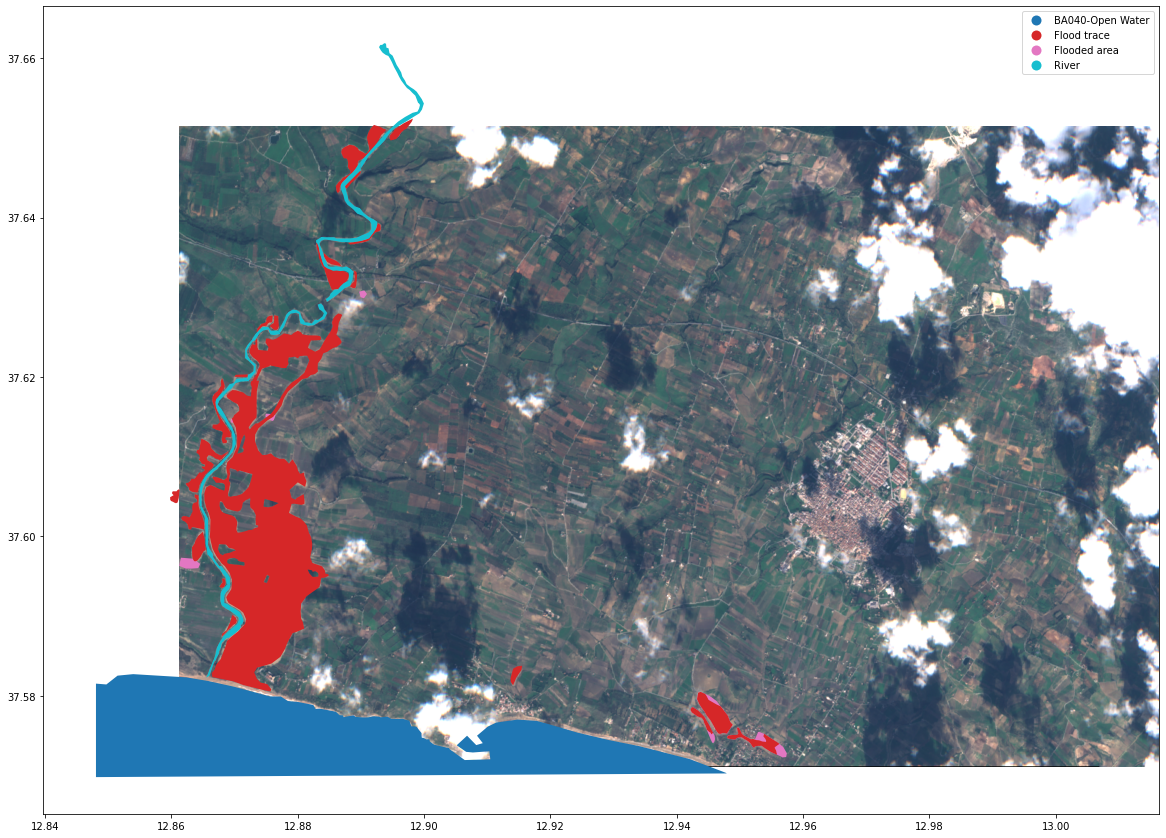

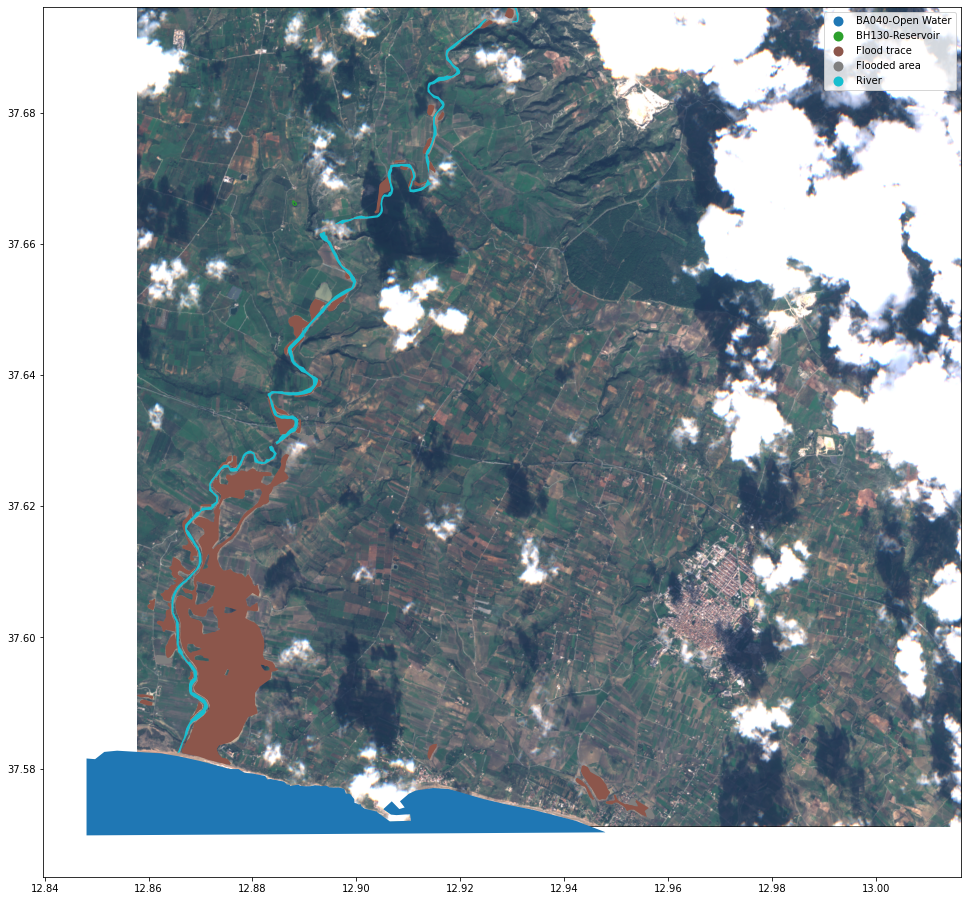

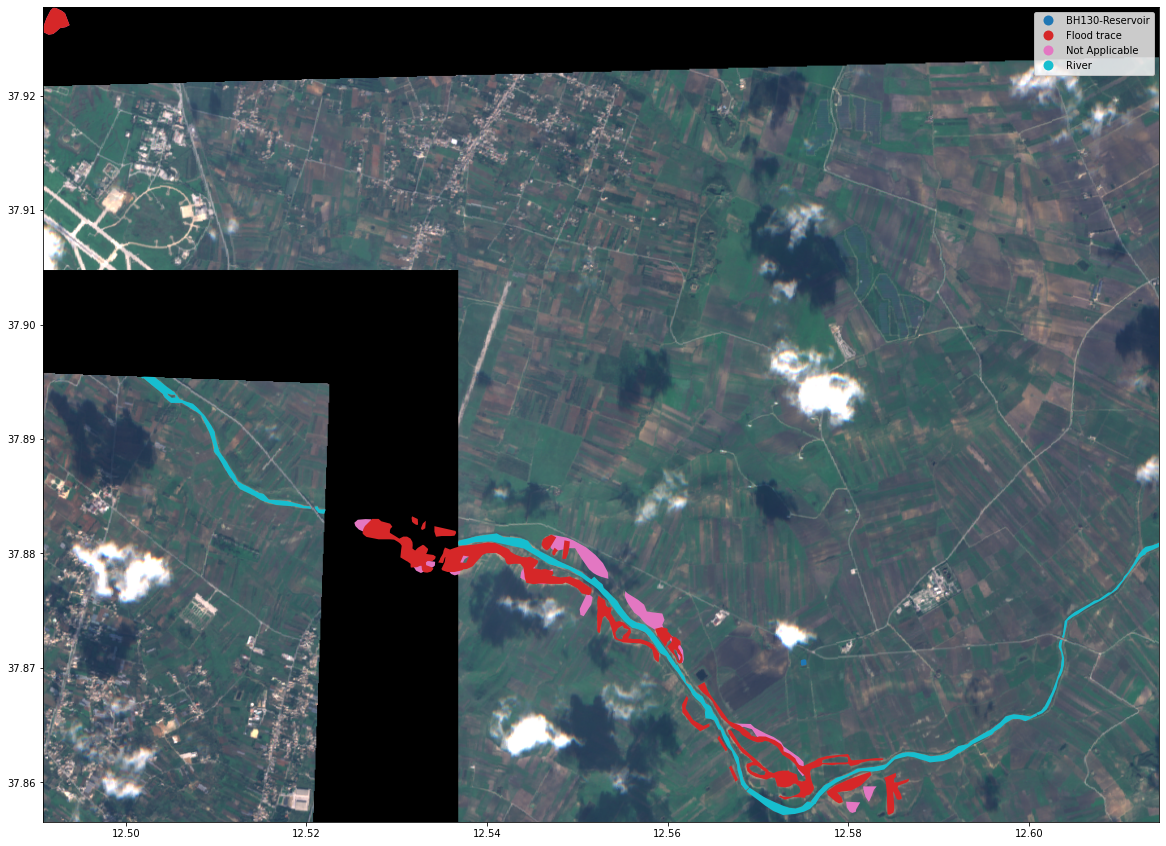

In [14]:
# Get and display a geotiff
# Note: RasterIO really doesn't like not having direct filesystem access, hence the usage of MemoryFile and lack
# of a simpler Pythoninc API (e.g., json.load()) for reading from a file handle directly
import rasterio
import geopandas as gpd
import numpy as np
from rasterio import plot as rasterioplt
from matplotlib import pyplot as plt
from fs import open_fs
import json
from shapely.geometry import box

print("###### METADATA ######")
for metadata in my_map_data.metadata:
    with open_fs("gs://ml4floods/" + metadata.path+"?strict=False") as fs:
        with fs.open('', "r") as f:
            metadata_contents = json.load(f)
            print(metadata.path)
            print(json.dumps(metadata_contents, indent=4))
            print("\n")

for s2_img in my_map_data.satellite_images["S2"]:
    with rasterio.open("gs://ml4floods/" + s2_img.path, "r") as rst:
        # Get key components of the loaded image
        img = rst.read([4,3,2], window=None)
        bbox = rst.bounds
        transform = rst.transform

        # Plot the geotiff in its coordinate system
        fig, ax = plt.subplots(1,1,figsize=(20,16))
        rgb = np.clip(img/3000.,0,1)
        rasterioplt.show(rgb,transform=transform,ax=ax)

        # Load floodmaps identified as relevant to the area of the geotiff by our geographic index
        floodmaps = [gpd.read_file("gs://ml4floods/" + x.path, bbox=bbox) for x in my_map_data.floodmaps]
        pts = gpd.GeoDataFrame(gpd.GeoSeries(box(rst.bounds.left, rst.bounds.bottom, rst.bounds.right, rst.bounds.top) ), columns=["geometry"], crs="EPSG:4326")
        
        # Gather all of the floodmaps that we can find for a given area and append them to the GeoDataFrame
        master_floodmap = None
        for floodmap in floodmaps:
            try:
                intersections = gpd.overlay(floodmap, pts, how='intersection')
                if master_floodmap == None:
                    master_floodmap = floodmap
                else:
                    master_floodmap.append(floodmap)
            except:
                pass
            
        # Plot the segmentation part of the combined GeoDataFrame on top of the satellite image
        if master_floodmap is not None:
            master_floodmap.plot("w_class",ax=ax,legend=True)